In [1]:
# exercise 8
import scipy.io
boston = scipy.io.loadmat('boston.mat')

In [5]:
boston.keys()

dict_keys(['__globals__', '__version__', '__header__', 'boston'])

In [8]:
data = boston['boston']

In [30]:
feature = data[:,:data.shape[1]-1] # first 13 column as feature

In [35]:
target = data[:,-1]

In [64]:
from sklearn.utils import shuffle

In [65]:
x,y = shuffle(feature, target)

In [66]:
x.shape, y.shape

((506, 13), (506,))

In [78]:
num_train = 2 * int(x.shape[0] / 3)
num_train

336

In [80]:
train_feature = x[:num_train]
train_target = y[:num_train]
test_feature = x[num_train:]
test_target = y[num_train:]

In [167]:
def error2MSE(err):
    return err @ err / len(err)

In [168]:
# exercise 9
# (a)
# Using naive regression, by taking derivative, we know the constant should 
# the mean of of y
num_train = train_target.shape[0]
const = np.sum(train_target) / num_train
train_predict = const * np.ones_like(train_target)
test_predict = const * np.ones_like(test_target)
train_error = train_target - train_predict
test_error = test_target - test_predict
MSE_train = error2MSE(train_error)
MSE_test = error2MSE(test_error)
print("Naive_MSE_train:", MSE_train)
print("Naive_MSE_test:", MSE_test)

Naive_MSE_train: 88.8586617772
Naive_MSE_test: 76.5381757578


In [169]:
#(b) single attri
def single_lse(x,y):
    mean_x = np.sum(x) / len(x)
    mean_y = np.sum(y) / len(y)
    w = ((y - mean_y) @ x) / ((x - mean_x) @ x)
    b = mean_y - w * mean_x
    return w, b

In [171]:
att_num = train_feature.shape[1]
for i in range(att_num):
    train_att = train_feature[:,i]
    test_att = test_feature[:,i]
    w, b = single_lse(train_att, train_target)
    train_error = train_target - (train_att * w + b)
    MSE_train = error2MSE(train_error)
    test_error = test_target - (test_att * w + b)
    MSE_test = error2MSE(test_error)
    print("att_" + str(i))
    print("single_att_MSE_train:", MSE_train)
    print("single_att_MSE_test:", MSE_test)

att_0
single_att_MSE_train: 75.7507786261
single_att_MSE_test: 65.5475928209
att_1
single_att_MSE_train: 76.9441273315
single_att_MSE_test: 67.3967444525
att_2
single_att_MSE_train: 69.5024037748
single_att_MSE_test: 55.3605079671
att_3
single_att_MSE_train: 86.6211147926
single_att_MSE_test: 73.1895214669
att_4
single_att_MSE_train: 74.8169365155
single_att_MSE_test: 57.937640627
att_5
single_att_MSE_train: 43.3386473018
single_att_MSE_test: 44.4156563386
att_6
single_att_MSE_train: 77.2843217393
single_att_MSE_test: 63.279051221
att_7
single_att_MSE_train: 83.9873550579
single_att_MSE_test: 70.3605720879
att_8
single_att_MSE_train: 76.8584985351
single_att_MSE_test: 63.3670921437
att_9
single_att_MSE_train: 69.549278745
single_att_MSE_test: 59.1696459882
att_10
single_att_MSE_train: 63.1822730883
single_att_MSE_test: 62.4917238894
att_11
single_att_MSE_train: 80.5027022331
single_att_MSE_test: 64.9216158238
att_12
single_att_MSE_train: 42.8236075434
single_att_MSE_test: 29.994154883


In [194]:
# (c) all attributes
# using ridge regression with adding a bias term
col_bias = np.ones((train_feature.shape[0],1))
tf_with_bias = np.concatenate((train_feature,col_bias),axis = 1)

def ridgereg(fea_mtx, y_label, regu, num_p):
    return np.linalg.inv((fea_mtx.transpose() @ fea_mtx + regu * num_p * np.identity(fea_mtx.shape[1]))) @ fea_mtx.transpose() @ y_label
    
w = ridgereg(tf_with_bias, train_target, 1e-3, len(train_target))

In [195]:
w

array([ -6.48456806e-02,   4.83367253e-02,   5.17109176e-02,
         2.15582023e+00,  -9.46554297e+00,   4.96102477e+00,
        -9.15316395e-03,  -1.23046476e+00,   2.93864702e-01,
        -1.46129302e-02,  -7.27448587e-01,   1.12032806e-02,
        -4.92431958e-01,   1.97420291e+01])

In [196]:
train_error = train_target - tf_with_bias @ w
MSE_trian = error2MSE(train_error)
test_bias_col = np.ones((test_feature.shape[0],1))
test_f_with_bias = np.concatenate((test_feature,test_bias_col),axis=1)
test_error = test_target - test_f_with_bias @ w
MSE_test = error2MSE(test_error)
print("all_att_train_MSE", MSE_train)
print("all_att_test_MSE", MSE_test)

all_att_train_MSE 42.8236075434
all_att_test_MSE 20.4081481761


In [81]:
def kridgereg(kernal_matrix, y, r):
    # y is train label
    # r is regulazor
    # return the dual weight vector alpha
    # where w = X' * alpha
    dia = len(y)
    n = kernal_matrix.shape[0] # num of data points
    return np.linalg.inv(kernal_matrix + n * r * np.identity(dia)) @ y

In [ ]:
def dualcost(kernal_matrix, y, dual_a):
    # the square error of test set
    # given the kernal matrix by kernal funtion between
    # test set matrix and train_set matrix -- K(test,train)
    error = kernal_matrix @ dual_a - y
    return error @ error / len(error)

In [ ]:
def gaussian_function(x,x_,sig):
    dis = (x - x_) @ (x - x_)
    return np.exp(-dis/(2* sig ** 2))

In [ ]:
def gaussian_kernal(matrx_1, matrx_2, sig):
    # with size row of m_1 col of m2
    gaus_kernal = np.zeros((matrx_1.shape[0], matrx_2.shape[1]))
    for i in range(matrx_1.shape[0]):
        for j in range(matrx_2.shape[1]):
            gaus_kernal[i,j] = gaussian_function(matrx_1[i], matrx_2[:,j], sig)
    return gaus_kernal


In [139]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
regs = []
sigs = []
costs = []
for r in range(26,40):
    for sig in np.arange(7,13.5,0.5):
        regs.append(r)
        sigs.append(sig)
        kern = gaussian_kernal(train_feature, train_feature.transpose(), 2**sig)
        dual_a = kridgereg(kern, train_target, 2**(-r))
        test_kern = gaussian_kernal(test_feature, train_feature.transpose(), 2**sig)
        costs.append(dualcost(test_kern, test_target, dual_a))
    #plt.plot(sig_set, cost_set)
    #plt.title("r:" + str(r) + " sig:" + str(sig))
    #plt.show()
    

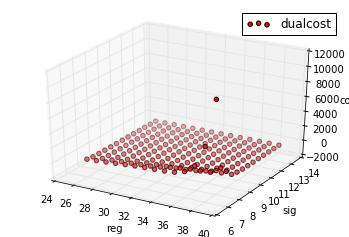

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(regs,sigs,costs, c='r',marker='o', label="dualcost")
ax.set_xlabel('reg')
ax.set_ylabel('sig')
ax.set_zlabel('cost')
plt.legend()
plt.show()

In [189]:
m = np.argmin(costs)
reg = regs[m]
sig = sigs[m]
reg,sig

(27, 9.0)

In [199]:
kern = gaussian_kernal(train_feature, train_feature.transpose(), 2**sig)
dual_a = kridgereg(kern, train_target, 2**(-reg))
test_kern = gaussian_kernal(test_feature, train_feature.transpose(), 2**sig)
test_MSE = dualcost(test_kern, test_target, dual_a)
train_MSE = dualcost(kern, train_target, dual_a)
print("kernal_ridge_train_MSE", train_MSE)
print("kernal_ridge_test_MSE", test_MSE)

kernal_ridge_train_MSE 8.45798142947
kernal_ridge_test_MSE 10.4157444502
